# Image processing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/data.zip > /dev/null


In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

## Importing the libraries

In [ ]:
from skimage.io import imread, imshow
import os 
import glob 
img_dir = '/content/data/train/benign' # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] #1D array which is going to store all our gray scale images 
for f1 in files: 
    img = imread(f1,as_gray=True) 
    data.append(img) 
no_benign=len(data)
img_dir = '/content/data/train/malignant' # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files: 
    img = imread(f1,as_gray=True) 
    data.append(img) 
no_malignant=len(data) - no_benign

In [ ]:
# from skimage import filters
# for i in range(len(data)):
#   data[i]=filters.sobel(data[i]) #use any filter

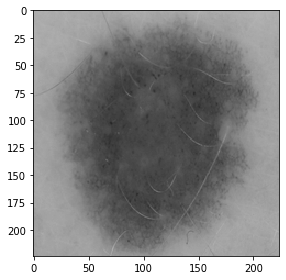

In [ ]:
imshow(data[0])

In [ ]:
from skimage.feature import local_binary_pattern
radius=2
n_points=16 
lbp=list()
for i in data:
    lbp.append(local_binary_pattern(i,n_points,radius)) #so here we are making a list of images for which we have calulated their LBP 

In [ ]:
#flattening the array
lbp_len=len(lbp)  #since lbp gives 2D array as output we are flattening it to 1D array
for i in range(0, lbp_len): 
  cache=lbp[i];
  lbp[i]=np.mean(cache, axis=1)
lbp[0].shape


(224,)

In [ ]:
X=pd.DataFrame(data = lbp) # so here we have lpb value for each image
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
0,22768.535714,24919.986607,25350.044643,22789.683036,20202.017857,21919.437500,21701.205357,24418.401786,22766.473214,20513.062500,23756.700893,22671.004464,22434.191964,21739.986607,19756.227679,20589.933036,22242.209821,22927.236607,23189.035714,21554.772321,22726.642857,21475.776786,23839.517857,23117.357143,20937.044643,24543.482143,22759.133929,20621.401786,25111.169643,19839.151786,17892.397321,17616.616071,21133.848214,22027.111607,23960.174107,22309.468750,21709.379464,21158.062500,22786.004464,25352.522321,...,39618.397321,35887.986607,35500.691964,33695.767857,35067.968750,37901.383929,37008.205357,40466.401786,38663.187500,37143.973214,37164.071429,34376.415179,36530.049107,37490.812500,39632.500000,38761.459821,36870.062500,38441.151786,36145.000000,34725.477679,36667.267857,39051.839286,40597.566964,39393.691964,38067.504464,35776.022321,37531.223214,40022.464286,37021.151786,34583.156250,37229.763393,38531.299107,39037.437500,40431.147321,40764.169643,37473.290179,38772.263393,40597.799107,18336.017857,231.102679
1,28214.209821,29556.406250,29077.589286,28543.973214,32515.281250,32193.723214,27506.785714,28732.254464,29044.473214,28969.232143,31441.142857,32405.781250,33729.455357,32941.879464,30279.852679,29553.486607,31457.285714,32001.102679,32526.245536,29272.821429,28697.580357,28877.468750,28699.433036,32066.008929,32083.299107,30525.379464,31402.468750,32186.839286,30470.772321,28902.763393,28982.620536,29559.950893,32078.607143,33174.058036,30901.062500,31206.125000,31773.910714,31195.125000,32470.272321,31168.991071,...,32964.361607,32374.410714,35659.669643,31814.892857,30773.330357,32391.950893,31183.642857,31483.424107,33669.468750,32310.629464,32868.937500,33437.892857,31363.772321,31634.151786,32614.901786,31250.437500,28750.517857,29174.995536,30554.218750,31883.093750,32987.642857,33987.285714,32343.584821,33442.026786,34814.651786,32180.834821,32232.816964,32584.410714,30122.294643,29796.165179,29843.205357,28398.223214,31306.348214,31480.334821,31795.933036,33222.406250,29577.080357,29651.232143,16176.464286,264.388393
2,28409.642857,27745.544643,30791.928571,30666.272321,30562.245536,32969.455357,33318.776786,36658.263393,35892.205357,29361.790179,28825.142857,28813.339286,32792.714286,35976.803571,35028.500000,29537.625000,27177.142857,31941.736607,34786.553571,30766.058036,26725.312500,28861.433036,26411.022321,28710.705357,28494.812500,29275.607143,34355.669643,33615.361607,34059.883929,34543.611607,34357.812500,32377.848214,30034.915179,30346.446429,32051.433036,31506.535714,31435.316964,28507.250000,27967.732143,28060.375000,...,30961.964286,32455.017857,30979.263393,32278.495536,33742.705357,36174.410714,32934.169643,30845.142857,29252.022321,33566.183036,32664.348214,32856.517857,29898.218750,26286.732143,23739.035714,28394.517857,30835.455357,31324.250000,30512.745536,29129.125000,34064.276786,33244.696429,29379.339286,26680.883929,27178.107143,27272.674107,29736.647321,27761.120536,27308.468750,24899.616071,24555.491071,27060.133929,28672.392857,27851.339286,27133.549107,31420.897321,27022.535714,26124.732143,16033.415179,279.495536
3,25941.084821,29145.656250,29127.571429,27661.504464,27377.075893,27651.705357,25656.151786,29034.870536,28619.571429,31666.035714,30043.959821,30776.468750,28889.424107,30086.928571,34487.790179,34476.290179,34607.540179,36779.424107,39079.098214,33875.580357,32148.888393,29589.450893,31452.665179,36096.946429,32629.508929,33524.227679,28965.486607,29335.169643,32521.790179,32981.892857,31200.950893,28240.031250,31557.736607,28633.517857,26068.575893,29726.803571,31241.549107,31089.669643,28799.941964,26843.464286,...,40653.022321,44851.209821,40691.428571,37156.066964,38102.450893,35

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = df_lbp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)


In [ ]:
#Extracting features using color moment
color_data=[]
img_dir = '/content/data/train/benign' # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
color_data = [] 
for f1 in files: 
    img = imread(f1) 
    color_data.append(img) 
#no_benign=len(data)
img_dir = '/content/data/train/malignant' # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
for f1 in files: 
    img = imread(f1) 
    color_data.append(img)

#color data now has all our images

In [ ]:
#so we have 3 colors-R,G,B and 3 moments, mean, meadian and std. deviation, so in total 9 moments 
import numpy as np
from statistics import mean, median, stdev
color_stats=[]
for i in color_data:
  image0=color_data[0]
  red_values=[]
  green_values=[]
  blue_values=[]
  for a in range(0,224):
    for b in range(0,224):
      red_values.append(image0[a][b][0])
      green_values.append(image0[a][b][1])
      blue_values.append(image0[a][b][2])
  stat_values=[]
  # stat_values.append(mean(red_values))
  # stat_values.append(stdev(red_values))
  # stat_values.append(median(red_values))
  # stat_values.append(mean(blue_values))
  # stat_values.append(stdev(blue_values))
  # stat_values.append(median(blue_values))
  # stat_values.append(mean(green_values))
  # stat_values.append(stdev(green_values))
  # stat_values.append(median(green_values))
  # stat_values=np.array(stat_values)
  # color_stats.append(stat_values)


/usr/lib/python3.7/statistics.py:384: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i])/2


In [ ]:
df_color=pd.DataFrame(color_stats)
df_color.head()

,0,1,2,3,4,5
0,231,112.0,142,30.0,141,29.0
1,231,112.0,142,30.0,141,29.0
2,231,112.0,142,30.0,141,29.0
3,231,112.0,142,30.0,141,29.0
4,231,112.0,142,30.0,141,29.0


In [ ]:
class_col=np.append(np.zeros(no_benign),np.ones(no_malignant))
y=pd.Series(class_col)

In [ ]:
#change X to whatever feature we need to use
#now we are combining all lbp and color moment dataframe
X=pd.concat([df_lbp, df_color], axis=1, join='inner')
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,0,1,2,3,4,5,6,7,8
0,36204.808036,38449.169643,37855.508929,32752.160714,36392.785714,35026.566964,31629.562500,35154.116071,33464.138393,30377.848214,32430.629464,32024.852679,30470.790179,30731.678571,36521.830357,37297.526786,31588.120536,33314.459821,35275.089286,38478.660714,37286.196429,34240.120536,36206.450893,36876.232143,32923.357143,35009.258929,33403.950893,26256.553571,27943.066964,32086.593750,34923.147321,30985.678571,30049.750000,35059.366071,33470.584821,28710.852679,33186.691964,31433.410714,33062.982143,34524.089286,...,31637.598214,36561.741071,32634.816964,30943.035714,30612.419643,32468.651786,32606.540179,29818.450893,34278.142857,31202.839286,29712.308036,28150.852679,26766.062500,27428.214286,31579.883929,32650.383929,33114.799107,29815.473214,29632.714286,31629.491071,30962.687500,27699.419643,26477.339286,31954.741071,31019.200893,25212.477679,28872.571429,31017.562500,30528.781250,8025.035714,3940.571429,231.131696,516.950768,240.0,142.97172,1452.400886,158.0,141.888233,1344.801523,157.0
1,25889.357143,33853.973214,36763.147321,30299.263393,30796.477679,32819.629464,32464.191964,33122.705357,32946.352679,33349.004464,36639.562500,38693.245536,34685.808036,35004.062500,35629.982143,36448.910714,34722.678571,35602.035714,34699.044643,37257.080357,37676.334821,38218.803571,38807.540179,35530.455357,33958.629464,30037.406250,27937.325893,35598.540179,30342.325893,34678.071429,39900.236607,34182.544643,36755.156250,35099.897321,33021.513393,30250.843750,31295.433036,32709.772321,31428.866071,32666.058036,...,35158.558036,30210.334821,38475.517857,41971.406250,35673.950893,35727.093750,36196.133929,38827.218750,36266.017857,35849.741071,34969.866071,35859.093750,31821.825893,28368.687500,34828.629464,33144.375000,34308.647321,34946.691964,29983.629464,32295.535714,29134.571429,26050.075893,26926.183036,23765.062500,23502.866071,28425.669643,26681.089286,29447.276786,30039.232143,8400.964286,4026.571429,231.131696,516.950768,240.0,142.97172,1452.400886,158.0,141.888233,1344.801523,157.0
2,39587.598214,39958.294643,30596.848214,30269.366071,31772.000000,35261.750000,32639.870536,30522.540179,30727.169643,31934.147321,30390.142857,32947.468750,33326.491071,26545.459821,26986.745536,29892.464286,28410.433036,28339.522321,30507.897321,34174.107143,37396.250000,36047.486607,35531.089286,34039.691964,36675.348214,37005.160714,36451.678571,39871.732143,34490.196429,35586.209821,37811.339286,36331.450893,35526.861607,35065.276786,33043.754464,29681.727679,34000.535714,29021.799107,26539.352679,29833.285714,...,27674.285714,29244.183036,25026.473214,21333.044643,23445.638393,27619.834821,31166.178571,32607.316964,33205.053571,29854.098214,24298.852679,30018.156250,31430.107143,29228.616071,24478.250000,22518.352679,27949.049107,31368.705357,28145.794643,29161.424107,27332.049107,30470.084821,29723.714286,34224.406250,29872.299107,25706.040179,28182.660714,28206.125000,32404.125000,8157.571429,3852.857143,231.131696,516.950768,240.0,142.97172,1452.400886,158.0,141.888233,1344.801523,157.0
3,46482.995536,44034.593750,43141.232143,45680.973214,46066.852679,46685.544643,44895.866071,42550.995536,41236.919643,45970.308036,44974.191964,41542.026786,39028.254464,38701.741071,40593.526786,39613.879464,40662.915179,43511.986607,47503.580357,45125.955357,39072.772321,41100.794643,40114.504464,39804.691964,30271.723214,32289.968750,37653.446429,37971.330357,39059.736607,35333.464286,34782.459821,34009.116071,35821.397321,36693.383929,34266.696429,34393.589286,32995.370536,32998.044643,32007.281250,32594.656250,...,24803.223214,27710.991071,28675.495536,26779.758929,21190.419643,28061.089286,28475.138393,24586.633929,27240.111607,21835.959821,19245.066964,26279.620536,30194.093750,29827.901786

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
principal=PCA(n_components=1)
principal.fit(X)
X.shape

(2637, 3)

In [ ]:
X=pd.DataFrame(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#X_train.info

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


``




ACCURACY OF THE RANDOM FOREST CLASSIFIER MODEL:  0.753030303030303


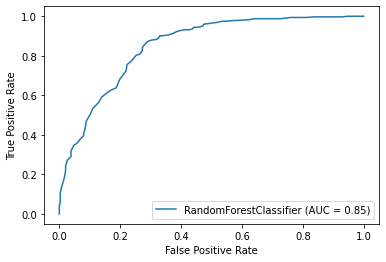

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 120)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE RANDOM FOREST CLASSIFIER MODEL: ", metrics.accuracy_score(y_test, y_pred))
#print(y_pred)
metrics.plot_roc_curve(clf, X_test, y_test)

K Nearest Neighbours Classifier


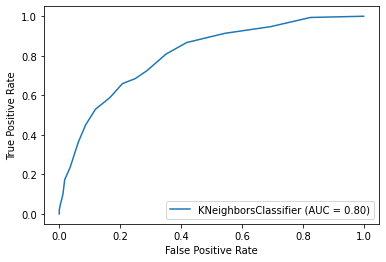

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
max_acc= 0
for i in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    if(acc>max_acc):
      max_acc=acc
      max_i=i
      y_pred_max=y_pred

y_pred=y_pred_max
knn_max=KNeighborsClassifier(n_neighbors=max_i)
knn_max.fit(X_train, y_train)
print("K Nearest Neighbours Classifier")
metrics.plot_roc_curve(knn_max, X_test, y_test)

K Nearest Neighbours Classifier


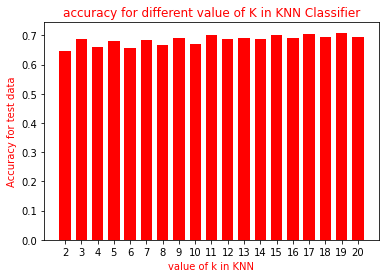

Maximum accuracy is 0.7090909090909091 when the value of k is 19 


In [ ]:
import matplotlib.pyplot as plt
xpos=np.arange(2,21)
plt.xlabel("value of k in KNN",color='r')
plt.ylabel("Accuracy for test data",color='r')                                           #label in y axis
plt.title("accuracy for different value of K in KNN Classifier",color='r')                                    #chart title                                                 
plt.bar(xpos,accuracy,width=0.7,color='r')
plt.xticks(xpos)
#plt.legend()
print("K Nearest Neighbours Classifier")
plt.show()
print("Maximum accuracy is {} when the value of k is {} ".format(max_acc, max_i))

Gaussian Naive Bayes model accuracy(in %): 0.7


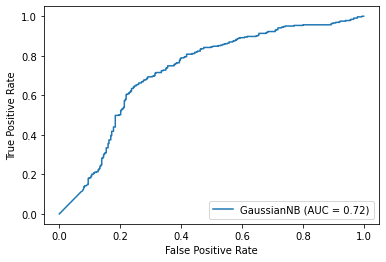

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))
metrics.plot_roc_curve(gnb, X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, plot_roc_curve
print("Gaussian Naive Bayes Classifier")
print("Confusion matrix : ")
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)) 
print("Precision score (TP) / (TP+FP) : ",precision_score(y_test, y_pred)) 
print("Recall score (TP) / (TP+FN): ",recall_score(y_test, y_pred)) 
print("Accuracy score (TP+TN) / (TP+TN+FP+FN): ",accuracy_score(y_test, y_pred)) 
print("F1 score (H.M of precision and recall): ", f1_score(y_test, y_pred))

Gaussian Naive Bayes Classifier
Confusion matrix : 
Predicted  0.0  1.0  All
Actual                  
0.0        253   84  337
1.0        114  209  323
All        367  293  660
Precision score (TP) / (TP+FP) :  0.7133105802047781
Recall score (TP) / (TP+FN):  0.6470588235294118
Accuracy score (TP+TN) / (TP+TN+FP+FN):  0.7
F1 score (H.M of precision and recall):  0.6785714285714285


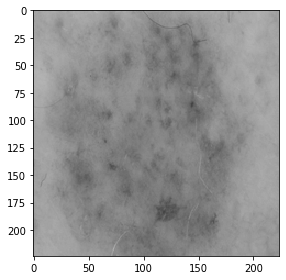

In [ ]:
imshow(data[0 ])

In [ ]:
import cv2
def dullrazor(img, lowbound=15, showimgs=True, filterstruc=3, inpaintmat=3):
    #grayscale
    imgtmp1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #applying a blackhat
    filterSize =(filterstruc, filterstruc)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize) 
    imgtmp2 = cv2.morphologyEx(imgtmp1, cv2.MORPH_BLACKHAT, kernel)

    #0=skin and 255=hair
    ret, mask = cv2.threshold(imgtmp2, lowbound, 255, cv2.THRESH_BINARY)
    
    #inpainting
    img_final = cv2.inpaint(img, mask, inpaintmat ,cv2.INPAINT_TELEA)
    
    if showimgs:
        print("_____DULLRAZOR_____")
        plt.imshow(imgtmp1, cmap="gray")
        plt.show()
        plt.imshow(imgtmp2, cmap='gray')
        plt.show()
        plt.imshow(mask, cmap='gray')
        plt.show()
        plt.imshow(img_final)
        plt.show()
        print("___________________")

    return img_final


In [ ]:
dullrazor(data[0])

error: ignored